In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import string
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('C:\\Users\\KIRHIKAGURUMURTHY\\Desktop\\PES stuff\\Projects\\University_Ranking\\Datasets\\Twitter\\final_iitm.csv')
wn = nltk.WordNetLemmatizer()
df

,Unnamed: 0,Tweet_text,date,username,retweets,hashtags,uni_handle,compound,Sentiment
0,0,"Manage to give best TIME to your BODY, because...",2019-06-29 20:32:00+00:00,SreedharBevara,1,#MomentofSignal #Inspiration #motivation #Lead...,0.0,0.8750,Positive
1,1,This. Was. At. IIT Madras. A premier instituti...,2019-06-29 17:51:31+00:00,purpultat,0,NaN,0.0,0.7430,Positive
2,2,You misinformed about history or just high on ...,2019-06-29 17:50:58+00:00,Siddhu_1233,0,#Pappumutra,0.0,-0.5290,Negative
3,3,"That's nothing, nobody figured out my jati at ...",2019-06-29 15:55:17+00:00,RajeevSrinivasa,26,NaN,0.0,0.0000,Neutral
4,4,"Yes, but @iitmadras can do more, seem to be in...",2019-06-29 14:12:31+00:00,SundarSrik,0,NaN,0.0,0.2828,Positive
...,...,...,...,...,...,...,...,...,...
20105,20105,True that @iitbombay @iitdelhi @iitmadras @IIT...,2020-05-01 03:44:51+00:00,DrGauravNarula,3,NaN,0.0,0.7639,Positive
20106,20106,IIT Madras-backed startups develop PPEs to fig...,2020-05-01 01:54:54+00:00,YuvNewsOfficial,0,NaN,0.0,-0.3818,Negative
20107,20107,The Future of Education Around the Globe and t...,2020-05-01 01:38:59+00:00,MalaCShekhar,0,#COVID__19,0.0,0.0000,Neutral
20108,20108,iit madras: IIT-Madras backed startups provide...,2020-05-01 00:18:36+00:00,Anop24,1,NaN,0.0,0.0258,Neutral


In [15]:
#df=df.drop(columns="Unnamed: 0")
df = df.rename(columns={"date":"timestamp"})
df

,Tweet_text,timestamp,username,retweets,hashtags,uni_handle,compound,Sentiment
0,"Manage to give best TIME to your BODY, because...",2019-06-29 20:32:00+00:00,SreedharBevara,1,#MomentofSignal #Inspiration #motivation #Lead...,0.0,0.8750,Positive
1,This. Was. At. IIT Madras. A premier instituti...,2019-06-29 17:51:31+00:00,purpultat,0,NaN,0.0,0.7430,Positive
2,You misinformed about history or just high on ...,2019-06-29 17:50:58+00:00,Siddhu_1233,0,#Pappumutra,0.0,-0.5290,Negative
3,"That's nothing, nobody figured out my jati at ...",2019-06-29 15:55:17+00:00,RajeevSrinivasa,26,NaN,0.0,0.0000,Neutral
4,"Yes, but @iitmadras can do more, seem to be in...",2019-06-29 14:12:31+00:00,SundarSrik,0,NaN,0.0,0.2828,Positive
...,...,...,...,...,...,...,...,...
20105,True that @iitbombay @iitdelhi @iitmadras @IIT...,2020-05-01 03:44:51+00:00,DrGauravNarula,3,NaN,0.0,0.7639,Positive
20106,IIT Madras-backed startups develop PPEs to fig...,2020-05-01 01:54:54+00:00,YuvNewsOfficial,0,NaN,0.0,-0.3818,Negative
20107,The Future of Education Around the Globe and t...,2020-05-01 01:38:59+00:00,MalaCShekhar,0,#COVID__19,0.0,0.0000,Neutral
20108,iit madras: IIT-Madras backed startups provide...,2020-05-01 00:18:36+00:00,Anop24,1,NaN,0.0,0.0258,Neutral


In [18]:
df = df.rename(columns={"Tweet_text":"text"})

In [16]:
df['Timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format = "%d/%m/%Y", utc  = False)
df

,Tweet_text,timestamp,username,retweets,hashtags,uni_handle,compound,Sentiment,Timestamp
0,"Manage to give best TIME to your BODY, because...",2019-06-29 20:32:00+00:00,SreedharBevara,1,#MomentofSignal #Inspiration #motivation #Lead...,0.0,0.8750,Positive,2019-06-29 20:32:00+00:00
1,This. Was. At. IIT Madras. A premier instituti...,2019-06-29 17:51:31+00:00,purpultat,0,NaN,0.0,0.7430,Positive,2019-06-29 17:51:31+00:00
2,You misinformed about history or just high on ...,2019-06-29 17:50:58+00:00,Siddhu_1233,0,#Pappumutra,0.0,-0.5290,Negative,2019-06-29 17:50:58+00:00
3,"That's nothing, nobody figured out my jati at ...",2019-06-29 15:55:17+00:00,RajeevSrinivasa,26,NaN,0.0,0.0000,Neutral,2019-06-29 15:55:17+00:00
4,"Yes, but @iitmadras can do more, seem to be in...",2019-06-29 14:12:31+00:00,SundarSrik,0,NaN,0.0,0.2828,Positive,2019-06-29 14:12:31+00:00
...,...,...,...,...,...,...,...,...,...
20105,True that @iitbombay @iitdelhi @iitmadras @IIT...,2020-05-01 03:44:51+00:00,DrGauravNarula,3,NaN,0.0,0.7639,Positive,2020-05-01 03:44:51+00:00
20106,IIT Madras-backed startups develop PPEs to fig...,2020-05-01 01:54:54+00:00,YuvNewsOfficial,0,NaN,0.0,-0.3818,Negative,2020-05-01 01:54:54+00:00
20107,The Future of Education Around the Globe and t...,2020-05-01 01:38:59+00:00,MalaCShekhar,0,#COVID__19,0.0,0.0000,Neutral,2020-05-01 01:38:59+00:00
20108,iit madras: IIT-Madras backed startups provide...,2020-05-01 00:18:36+00:00,Anop24,1,NaN,0.0,0.0258,Neutral,2020-05-01 00:18:36+00:00


In [19]:
def giveday(timestamp):
    day_string = timestamp.day
    return day_string
def givemonth(timestamp):
    month_string = timestamp.month
    return month_string
def giveyear(timestamp):
    year_string = timestamp.year
    return year_string
df['day'] = df['Timestamp'].apply(giveday)
df['month'] = df['Timestamp'].apply(givemonth)
df['year'] = df['Timestamp'].apply(giveyear)
months = df.groupby('month')
monthcount = months['text'].count()
monthdict = monthcount.to_dict()

df["monthName"] = df.Timestamp.dt.month_name()

df["dayName"] = df.Timestamp.dt.day_name()
df


,text,timestamp,username,retweets,hashtags,uni_handle,compound,Sentiment,Timestamp,day,month,year,monthName,dayName
0,"Manage to give best TIME to your BODY, because...",2019-06-29 20:32:00+00:00,SreedharBevara,1,#MomentofSignal #Inspiration #motivation #Lead...,0.0,0.8750,Positive,2019-06-29 20:32:00+00:00,29,6,2019,June,Saturday
1,This. Was. At. IIT Madras. A premier instituti...,2019-06-29 17:51:31+00:00,purpultat,0,NaN,0.0,0.7430,Positive,2019-06-29 17:51:31+00:00,29,6,2019,June,Saturday
2,You misinformed about history or just high on ...,2019-06-29 17:50:58+00:00,Siddhu_1233,0,#Pappumutra,0.0,-0.5290,Negative,2019-06-29 17:50:58+00:00,29,6,2019,June,Saturday
3,"That's nothing, nobody figured out my jati at ...",2019-06-29 15:55:17+00:00,RajeevSrinivasa,26,NaN,0.0,0.0000,Neutral,2019-06-29 15:55:17+00:00,29,6,2019,June,Saturday
4,"Yes, but @iitmadras can do more, seem to be in...",2019-06-29 14:12:31+00:00,SundarSrik,0,NaN,0.0,0.2828,Positive,2019-06-29 14:12:31+00:00,29,6,2019,June,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,True that @iitbombay @iitdelhi @iitmadras @IIT...,2020-05-01 03:44:51+00:00,DrGauravNarula,3,NaN,0.0,0.7639,Positive,2020-05-01 03:44:51+00:00,1,5,2020,May,Friday
20106,IIT Madras-backed startups develop PPEs to fig...,2020-05-01 01:54:54+00:00,YuvNewsOfficial,0,NaN,0.0,-0.3818,Negative,2020-05-01 01:54:54+00:00,1,5,2020,May,Friday
20107,The Future of Education Around the Globe and t...,2020-05-01 01:38:59+00:00,MalaCShekhar,0,#COVID__19,0.0,0.0000,Neutral,2020-05-01 01:38:59+00:00,1,5,2020,May,Friday
20108,iit madras: IIT-Madras backed startups provide...,2020-05-01 00:18:36+00:00,Anop24,1,NaN,0.0,0.0258,Neutral,2020-05-01 00:18:36+00:00,1,5,2020,May,Friday


In [22]:
session2019 = df[df['year'] == 2019]
session2020 = df[df['year'] == 2020]
months2019=session2019.groupby('month')
monthcount2019 = months2019['text'].count()
monthdict2019=monthcount2019.to_dict()
months2020=session2020.groupby('month')
monthcount2020 = months2020['text'].count()
monthdict2020=monthcount2020.to_dict()

In [23]:
monthdict2019

{6: 687, 7: 1345, 8: 1095, 9: 1953, 10: 1875, 11: 3369, 12: 3805}

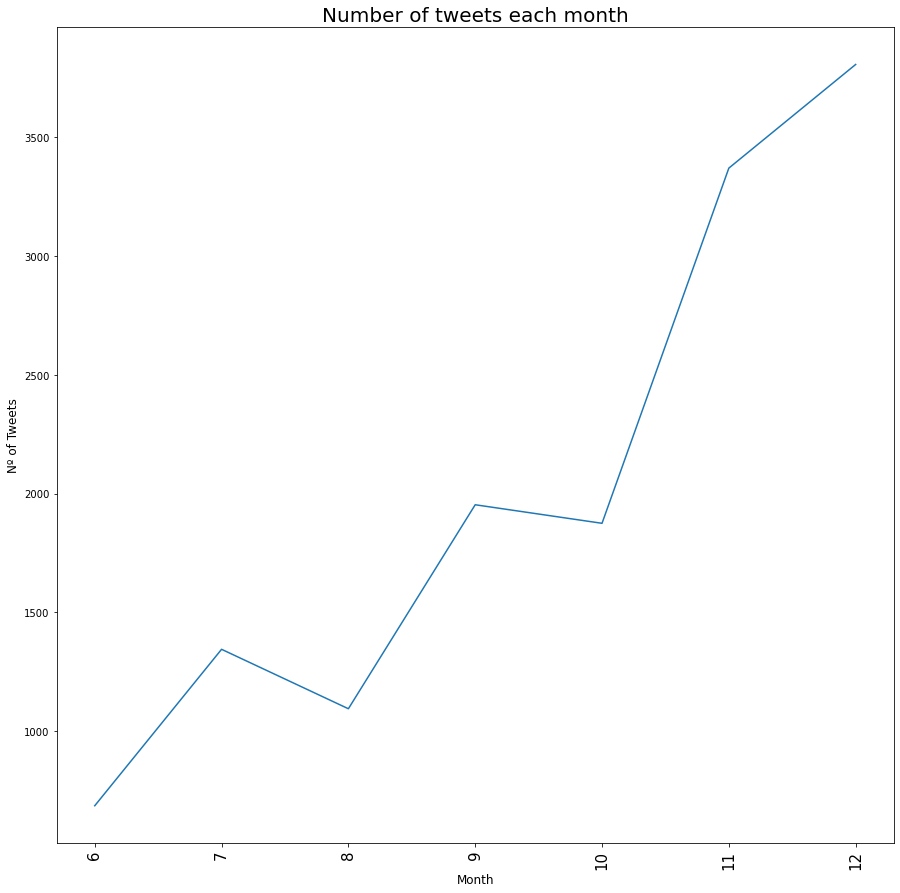

In [24]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(monthdict2019.keys()), list(monthdict2019.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets each month', fontsize = 20)
plt.show()

In [25]:
grouped = session2019.groupby('month')

In [26]:
June2019 = grouped.get_group(6)
July2019 = grouped.get_group(7)
Aug2019 = grouped.get_group(8)
Sept2019 = grouped.get_group(9)
Oct2019 = grouped.get_group(10)
Nov2019 = grouped.get_group(11)
Dec2019 = grouped.get_group(12)

In [27]:
days_June2019 = June2019.groupby('day')
daycount_June2019 = days_June2019['text'].count()
timedict_June2019 = daycount_June2019.to_dict()

days_July2019 = July2019.groupby('day')
daycount_July2019 = days_July2019['text'].count()
timedict_July2019 = daycount_July2019.to_dict()

days_Aug2019 = Aug2019.groupby('day')
daycount_Aug2019 = days_Aug2019['text'].count()
timedict_Aug2019 = daycount_Aug2019.to_dict()

days_Sept2019 = Sept2019.groupby('day')
daycount_Sept2019 = days_Sept2019['text'].count()
timedict_Sept2019 = daycount_Sept2019.to_dict()

days_Oct2019 =Oct2019.groupby('day')
daycount_Oct2019 = days_Oct2019['text'].count()
timedict_Oct2019 = daycount_Oct2019.to_dict()

days_Nov2019 = Nov2019.groupby('day')
daycount_Nov2019 = days_Nov2019['text'].count()
timedict_Nov2019 = daycount_Nov2019.to_dict()

days_Dec2019 = Dec2019.groupby('day')
daycount_Dec2019 = days_Dec2019['text'].count()
timedict_Dec2019 = daycount_Dec2019.to_dict()

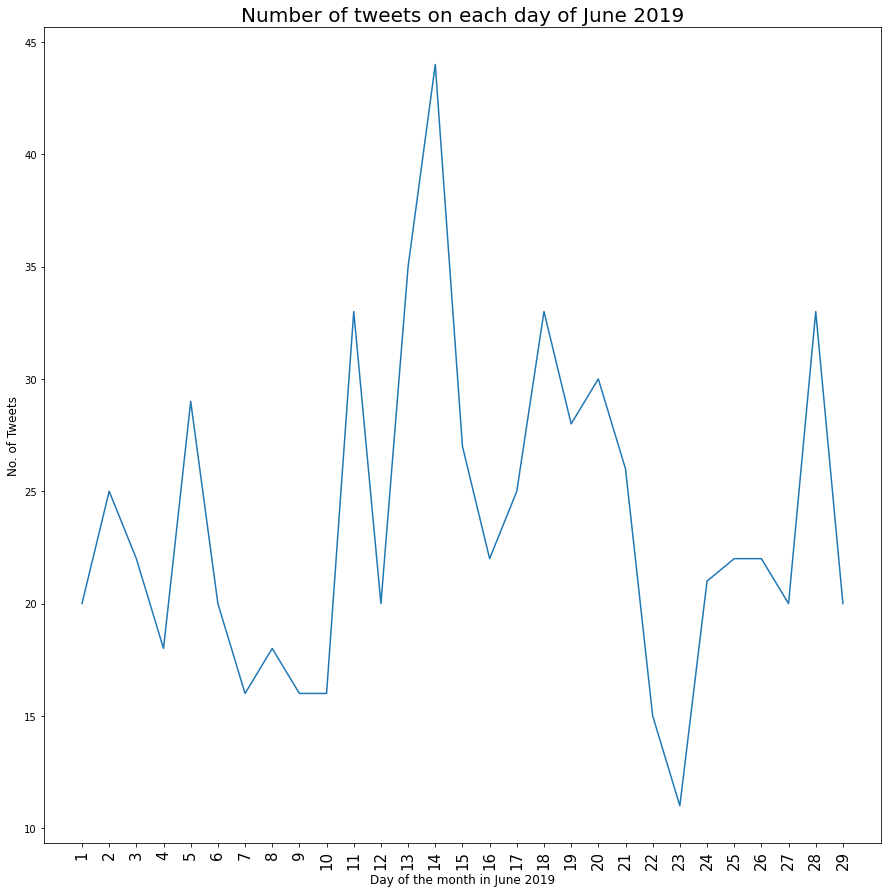

In [28]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_June2019.keys()), list(timedict_June2019.values()))
plt.xlabel('Day of the month in June 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_June2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of June 2019', fontsize = 20)
plt.show()

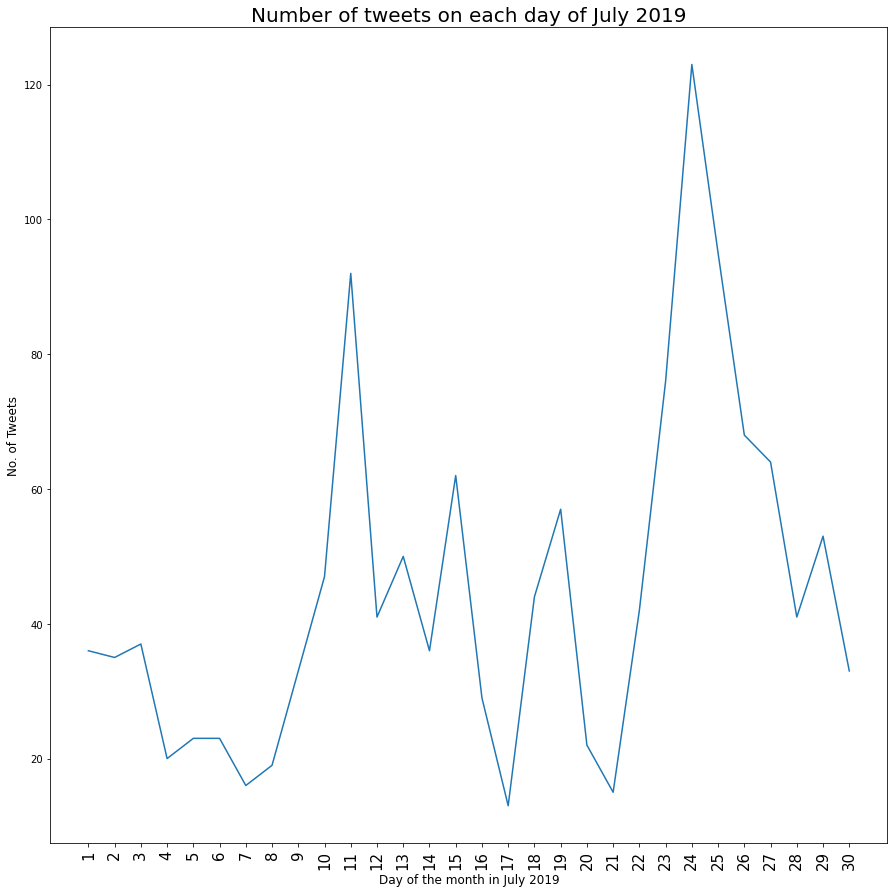

In [29]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_July2019.keys()), list(timedict_July2019.values()))
plt.xlabel('Day of the month in July 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_July2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of July 2019', fontsize = 20)
plt.show()

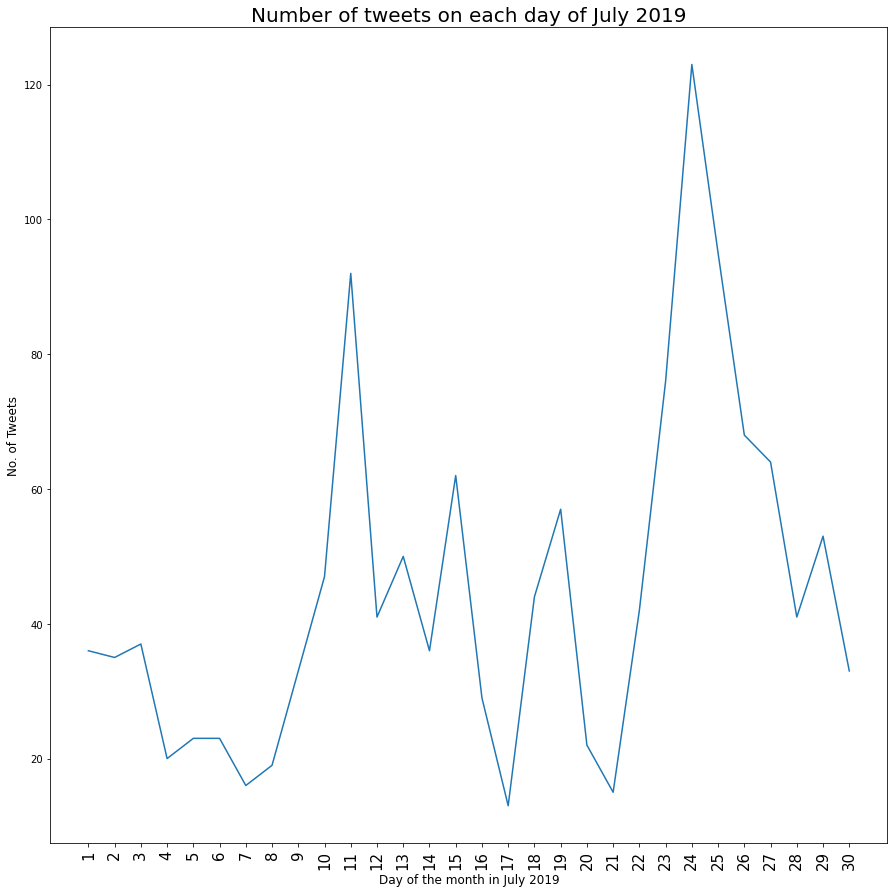

In [30]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_July2019.keys()), list(timedict_July2019.values()))
plt.xlabel('Day of the month in July 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_July2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of July 2019', fontsize = 20)
plt.show()

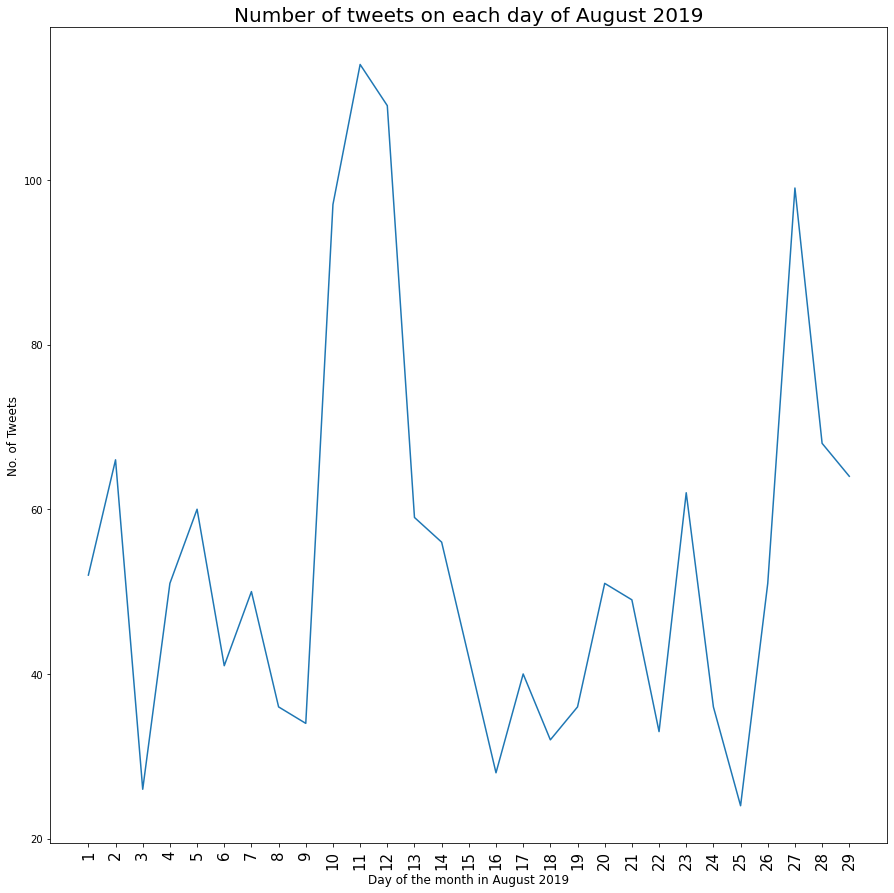

In [30]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Aug2019.keys()), list(timedict_Aug2019.values()))
plt.xlabel('Day of the month in August 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Aug2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of August 2019', fontsize = 20)
plt.show()


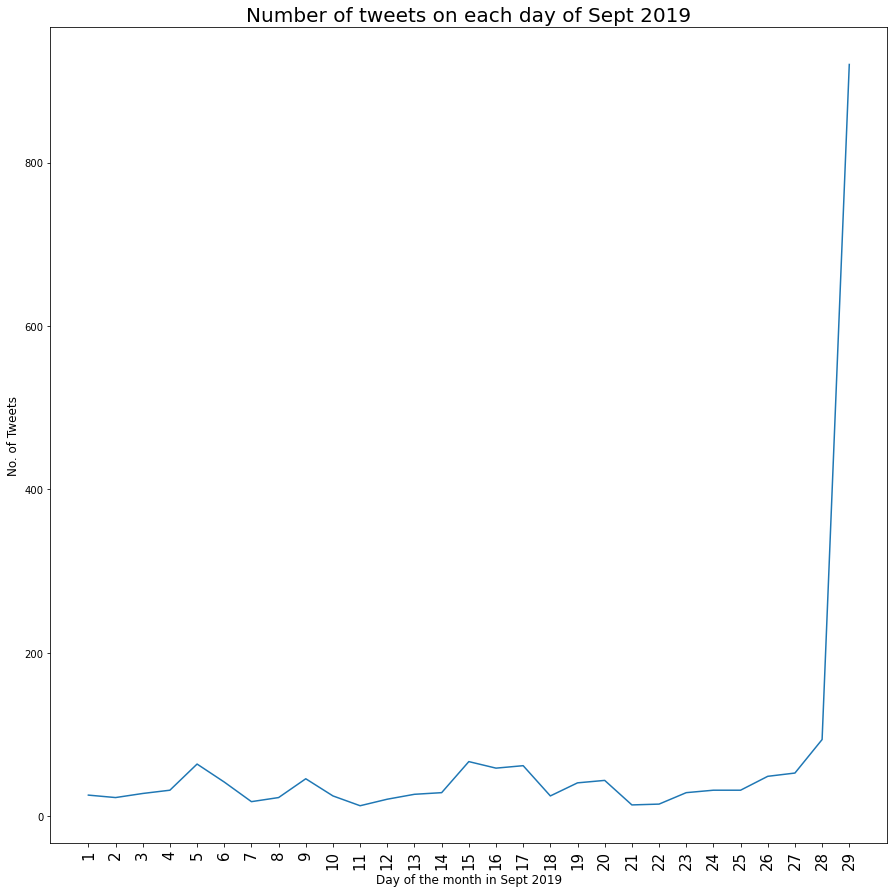

In [31]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Sept2019.keys()), list(timedict_Sept2019.values()))
plt.xlabel('Day of the month in Sept 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Sept2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Sept 2019', fontsize = 20)
plt.show()

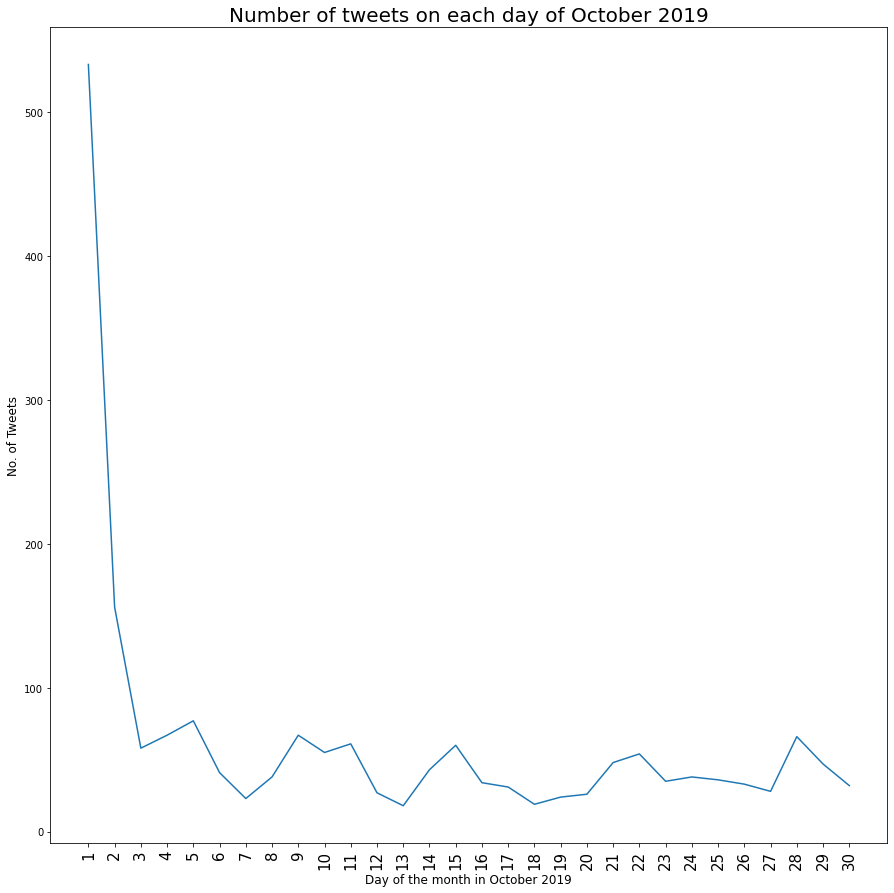

In [32]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Oct2019.keys()), list(timedict_Oct2019.values()))
plt.xlabel('Day of the month in October 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Oct2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of October 2019', fontsize = 20)
plt.show()

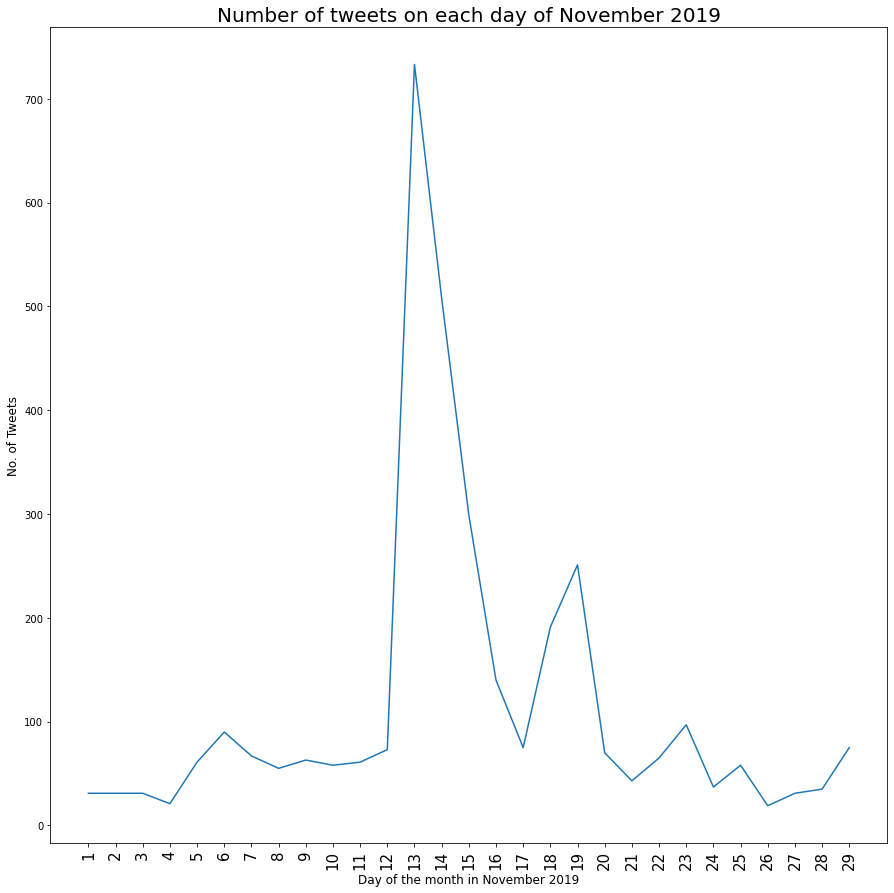

In [33]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Nov2019.keys()), list(timedict_Nov2019.values()))
plt.xlabel('Day of the month in November 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Nov2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of November 2019', fontsize = 20)
plt.show()

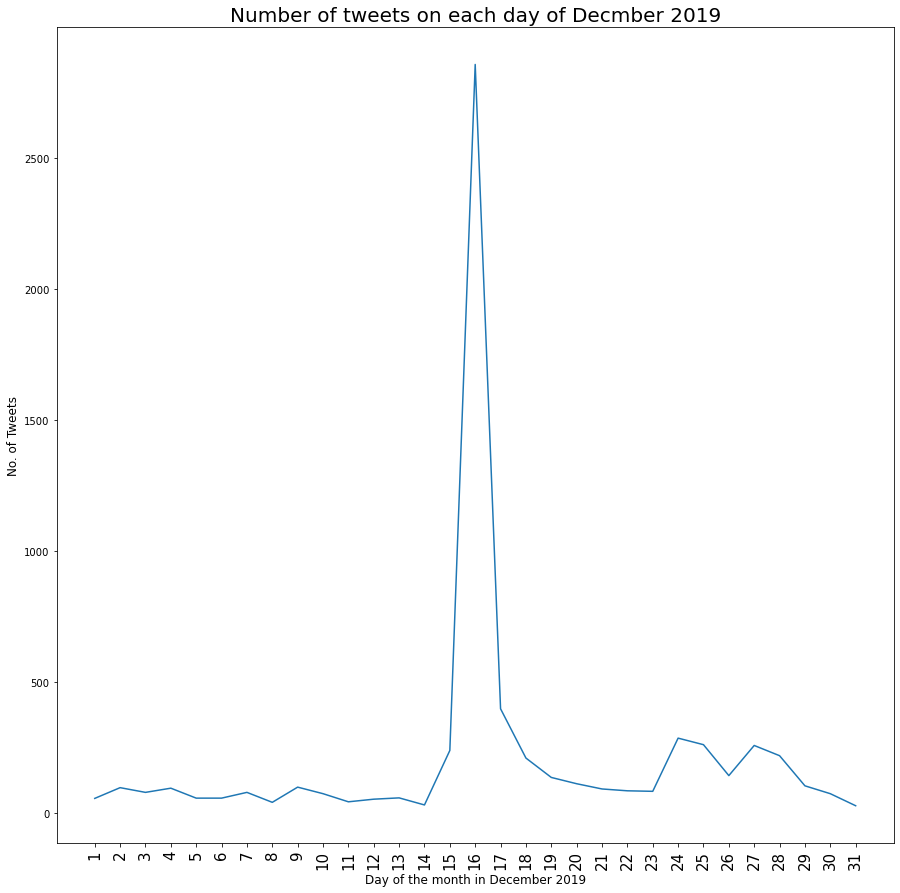

In [34]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Dec2019.keys()), list(timedict_Dec2019.values()))
plt.xlabel('Day of the month in December 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Dec2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Decmber 2019', fontsize = 20)
plt.show()

In [34]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


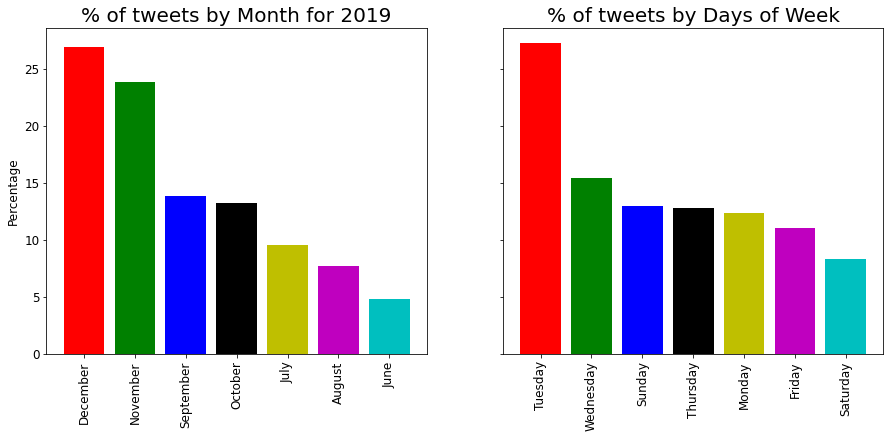

In [35]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = session2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month for 2019')

session2019["dayName"] = session2019.Timestamp.dt.day_name()
data = session2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


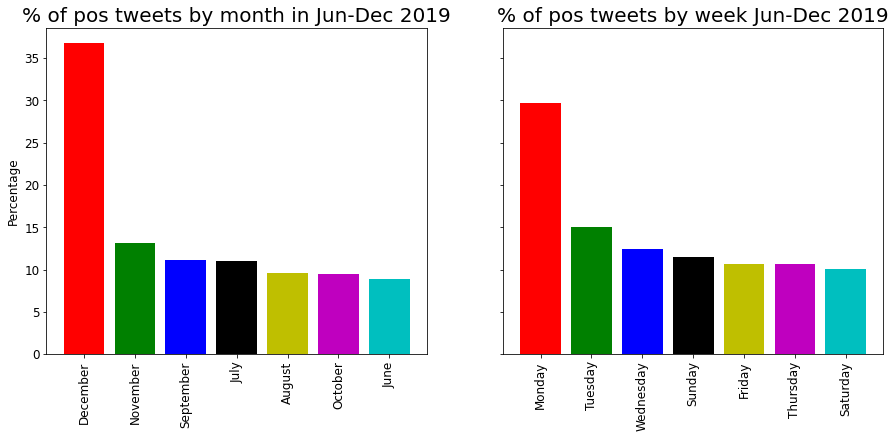

In [76]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2019 = session2019[session2019.Sentiment == 'Positive']
data = pos_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jun-Dec 2019')

data = session2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


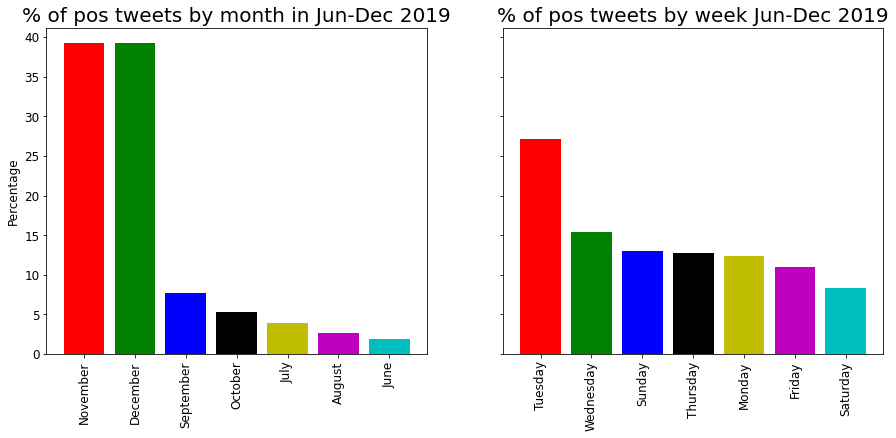

In [36]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2019 = session2019[session2019.Sentiment == 'Negative']
data = pos_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jun-Dec 2019')

data = session2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

In [37]:
pos_df2019 = session2019[session2019.Sentiment == 'Positive']
neg_df2019 = session2019[session2019.Sentiment == 'Negative']
neu_df2019 =session2019[session2019.Sentiment == 'Neutral']
pos_df2020 = session2020[session2020.Sentiment == 'Positive']
neg_df2020 = session2020[session2020.Sentiment == 'Negative']
neu_df2020 =session2020[session2020.Sentiment == 'Neutral']

In [38]:
senti2019 = pos_df2019.groupby('month')
senticount2019 = senti2019['text'].count()
sentidict2019 = senticount2019.to_dict()

senti2019neg = neg_df2019.groupby('month')
senticount2019neg = senti2019neg['text'].count()
sentidict2019neg = senticount2019neg.to_dict()

senti2019neu = neu_df2019.groupby('month')
senticount2019neu = senti2019neu['text'].count()
sentidict2019neu = senticount2019neu.to_dict()



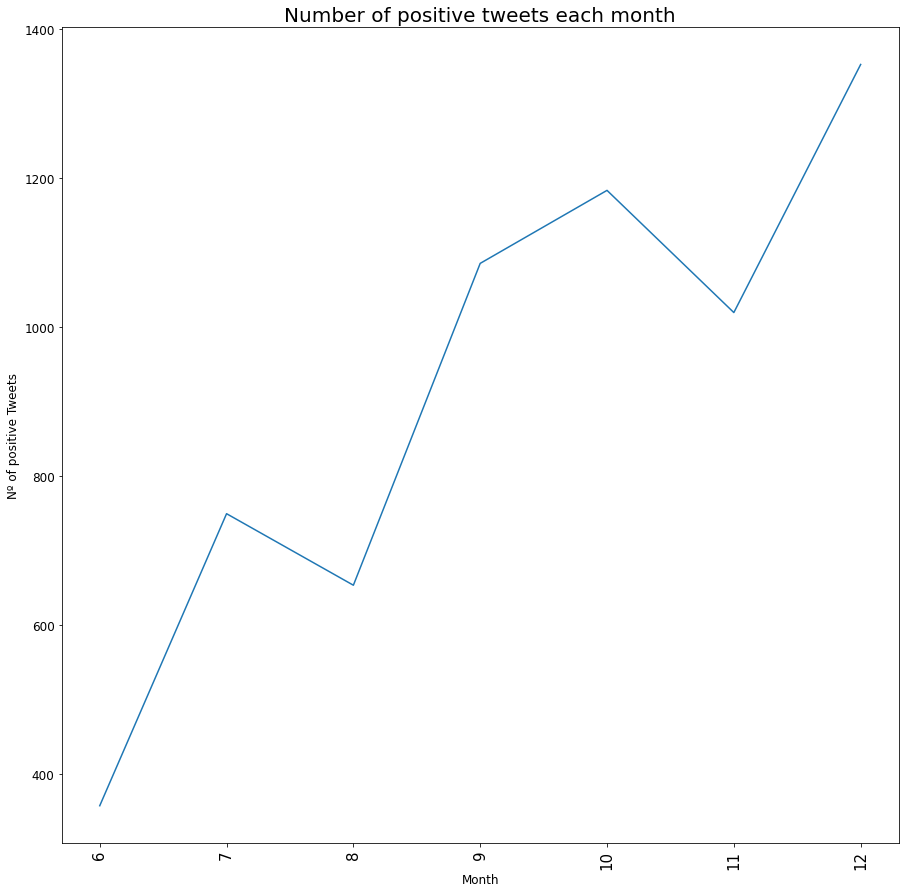

In [39]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2019.keys()), list(sentidict2019.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of positive Tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Number of positive tweets each month', fontsize = 20)
plt.show()


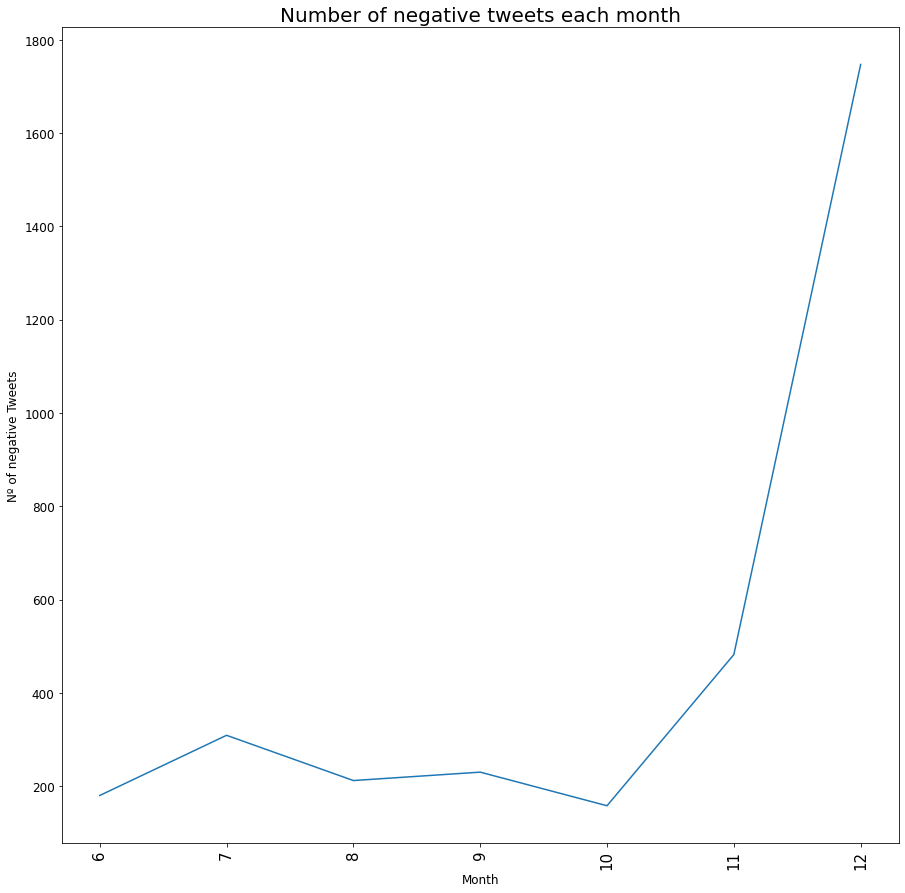

In [88]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2019neg.keys()), list(sentidict2019neg.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of negative Tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Number of negative tweets each month', fontsize = 20)
plt.show()

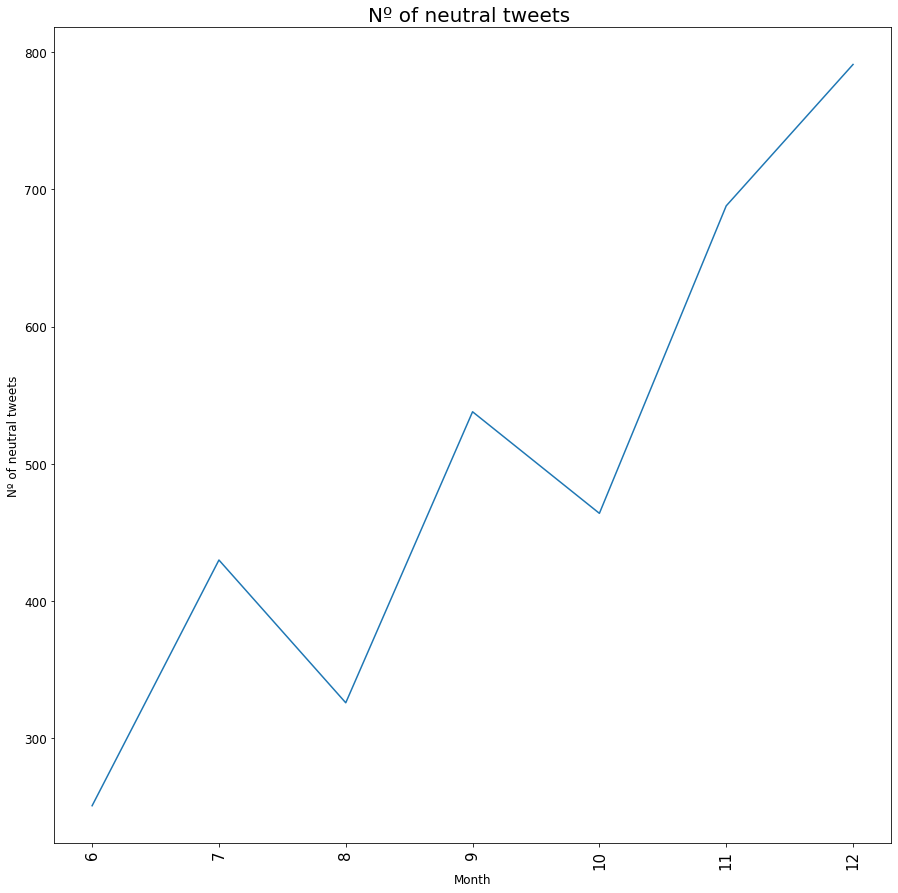

In [40]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2019neu.keys()),list(sentidict2019neu.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of neutral tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Nº of neutral tweets ', fontsize = 20)
plt.show()

In [41]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))


In [56]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatizer(x))

def listtostr(s):
    str1=" "
    return (str1.join(s))
df['Text_lemmatized_str'] = df['Text_lemmatized'].apply(lambda x: listtostr(x))
df.head()

session2019f = df[df['year'] == 2019]
session2020f = df[df['year'] == 2020]

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [43]:
wordfreq = {}
for sentence in session2019f['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [44]:
import operator
sorted_wordfreq=sorted(wordfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq

[('iit', 7387),
 ('madras', 6290),
 ('iitmadras', 5039),
 ('student', 3663),
 ('india', 2397),
 ('suicide', 1094),
 ('protest', 921),
 ('indian', 875),
 ('amp', 874),
 ('u', 824),
 ('technology', 790),
 ('german', 787),
 ('pm', 681),
 ('iitbombay', 659),
 ('via', 646),
 ('first', 638),
 ('country', 636),
 ('chennai', 618),
 ('one', 613),
 ('justiceforfathimalatheef', 591),
 ('modi', 585),
 ('university', 581),
 ('fathima', 580),
 ('year', 563),
 ('team', 556),
 ('research', 549),
 ('innovation', 544),
 ('institute', 528),
 ('iitdelhi', 500),
 ('professor', 474),
 ('sir', 468),
 ('caa', 466),
 ('faculty', 464),
 ('people', 443),
 ('please', 443),
 ('like', 440),
 ('also', 418),
 ('institution', 410),
 ('time', 403),
 ('get', 394),
 ('dont', 393),
 ('need', 375),
 ('know', 368),
 ('startup', 362),
 ('narendramodi', 357),
 ('latheef', 357),
 ('day', 356),
 ('muslim', 354),
 ('app', 342),
 ('world', 340),
 ('engineering', 339),
 ('protesting', 339),
 ('good', 337),
 ('take', 335),
 ('educa

In [46]:
most_freq = sorted_wordfreq[0:20]
most_freq

[('iit', 7387),
 ('madras', 6290),
 ('iitmadras', 5039),
 ('student', 3663),
 ('india', 2397),
 ('suicide', 1094),
 ('protest', 921),
 ('indian', 875),
 ('amp', 874),
 ('u', 824),
 ('technology', 790),
 ('german', 787),
 ('pm', 681),
 ('iitbombay', 659),
 ('via', 646),
 ('first', 638),
 ('country', 636),
 ('chennai', 618),
 ('one', 613),
 ('justiceforfathimalatheef', 591)]

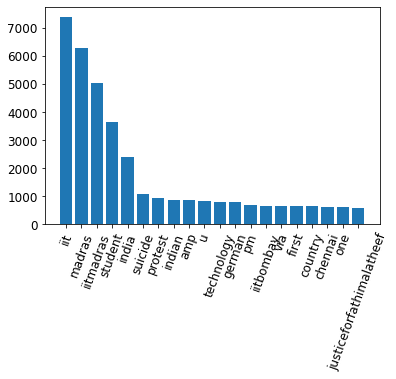

In [47]:
plt.bar(range(len(most_freq)), [val[1] for val in most_freq], align='center')
plt.xticks(range(len(most_freq)), [val[0] for val in most_freq])
plt.xticks(rotation=70)
plt.show()

In [55]:
df['hashtags'].str.replace('[\[,\]]', '')
df = df[df['hashtags'].notnull()]

In [57]:
hashtagfreq = {}
for sentence in session2019f['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq.keys():
            hashtagfreq[token] = 1
        else:
            hashtagfreq[token] +=1

In [58]:
sorted_hashtag=sorted(hashtagfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag

[('#', 14471),
 ('IITMadras', 1006),
 ('JusticeForFathimaLatheef', 548),
 ('iitmadras', 342),
 ('IIT', 241),
 ('FathimaLatheef', 206),
 ('JusticeForFathima', 204),
 ('India', 142),
 ('Chennai', 141),
 ('innovation', 82),
 ('AI', 72),
 ('Bigil', 62),
 ('IITM', 61),
 ('CAA_NRCProtests', 61),
 ('FathimaLathif', 60),
 ('TamilNadu', 56),
 ('IITBombay', 52),
 ('NRC_CAA_Protest', 51),
 ('technology', 50),
 ('Madras', 49),
 ('CAA', 48),
 ('iit', 47),
 ('startups', 47),
 ('startup', 42),
 ('india', 41),
 ('mtechfeehike', 41),
 ('CAA_NRC_Protest', 39),
 ('IITChennai', 38),
 ('education', 37),
 ('ArtificialIntelligence', 37),
 ('suicide', 37),
 ('IITM60', 36),
 ('CAAProtests', 36),
 ('entrepreneurship', 34),
 ('SpaceX', 34),
 ('ElonMusk', 33),
 ('kalamconference', 33),
 ('Thalapathy', 33),
 ('JamiaProtest', 33),
 ('Hyperloop', 31),
 ('JamiaMilia', 31),
 ('MachineLearning', 30),
 ('research', 29),
 ('DeepLearning', 29),
 ('JNU', 28),
 ('CBI', 27),
 ('curiousprogram', 27),
 ('iitm', 26),
 ('Innovat

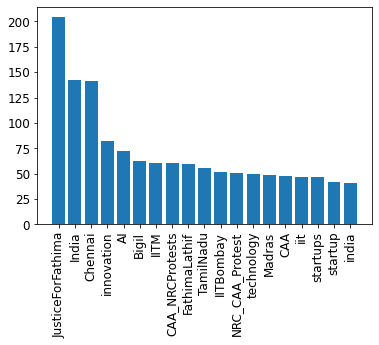

In [59]:
most_freqht = sorted_hashtag[6:25]
plt.bar(range(len(most_freqht)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()

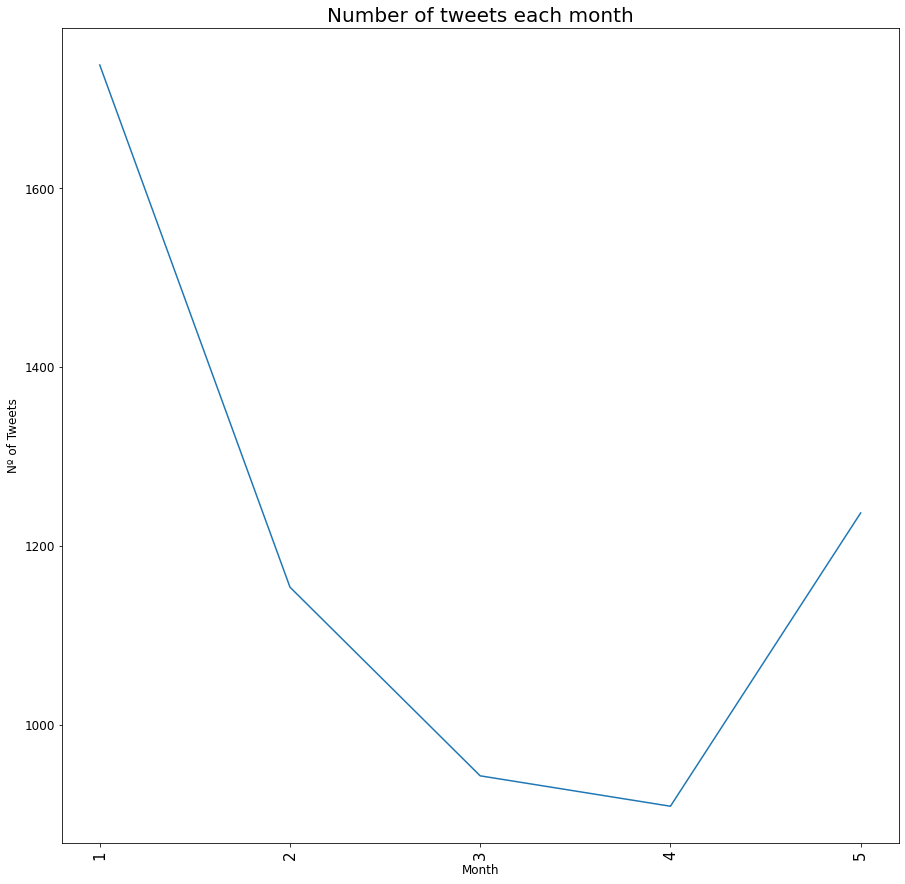

In [60]:
#2020
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(monthdict2020.keys()), list(monthdict2020.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(monthdict2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets each month', fontsize = 20)
plt.show()

In [62]:
grouped2 = session2020.groupby('month')
Jan2020 = grouped2.get_group(1)
Feb2020 = grouped2.get_group(2)
Mar2020 = grouped2.get_group(3)
Apr2020 = grouped2.get_group(4)
May2020 = grouped2.get_group(5)
#June2020 = grouped2.get_group(6)


In [63]:
days_Jan2020 = Jan2020.groupby('day')
daycount_Jan2020 = days_Jan2020['text'].count()
timedict_Jan2020 = daycount_Jan2020.to_dict()

days_Feb2020 = Feb2020.groupby('day')
daycount_Feb2020 = days_Feb2020['text'].count()
timedict_Feb2020 = daycount_Feb2020.to_dict()

days_Mar2020 = Mar2020.groupby('day')
daycount_Mar2020 = days_Mar2020['text'].count()
timedict_Mar2020 = daycount_Mar2020.to_dict()

days_Apr2020 = Apr2020.groupby('day')
daycount_Apr2020 = days_Apr2020['text'].count()
timedict_Apr2020 = daycount_Apr2020.to_dict()

days_May2020 =May2020.groupby('day')
daycount_May2020 = days_May2020['text'].count()
timedict_May2020 = daycount_May2020.to_dict()

days_June2020 = June2020.groupby('day')
daycount_June2020 = days_June2020['text'].count()
timedict_June2020 = daycount_June2020.to_dict()

NameError: name 'June2020' is not defined

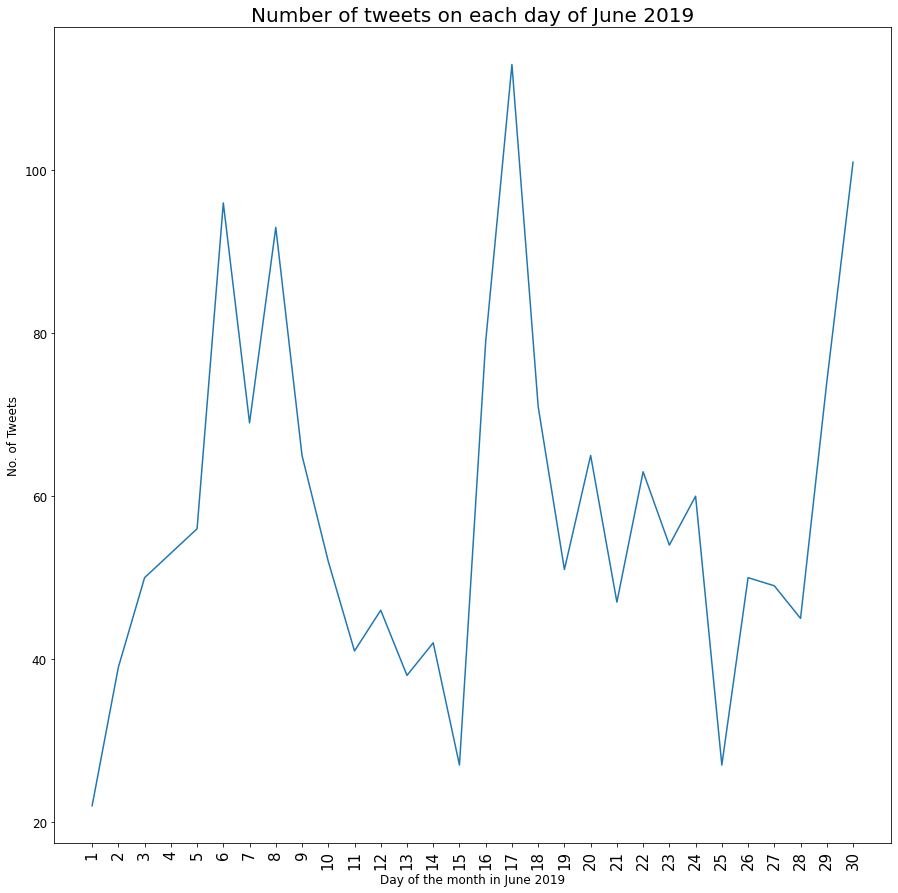

In [64]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Jan2020.keys()), list(timedict_Jan2020.values()))
plt.xlabel('Day of the month in June 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Jan2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of June 2019', fontsize = 20)
plt.show()

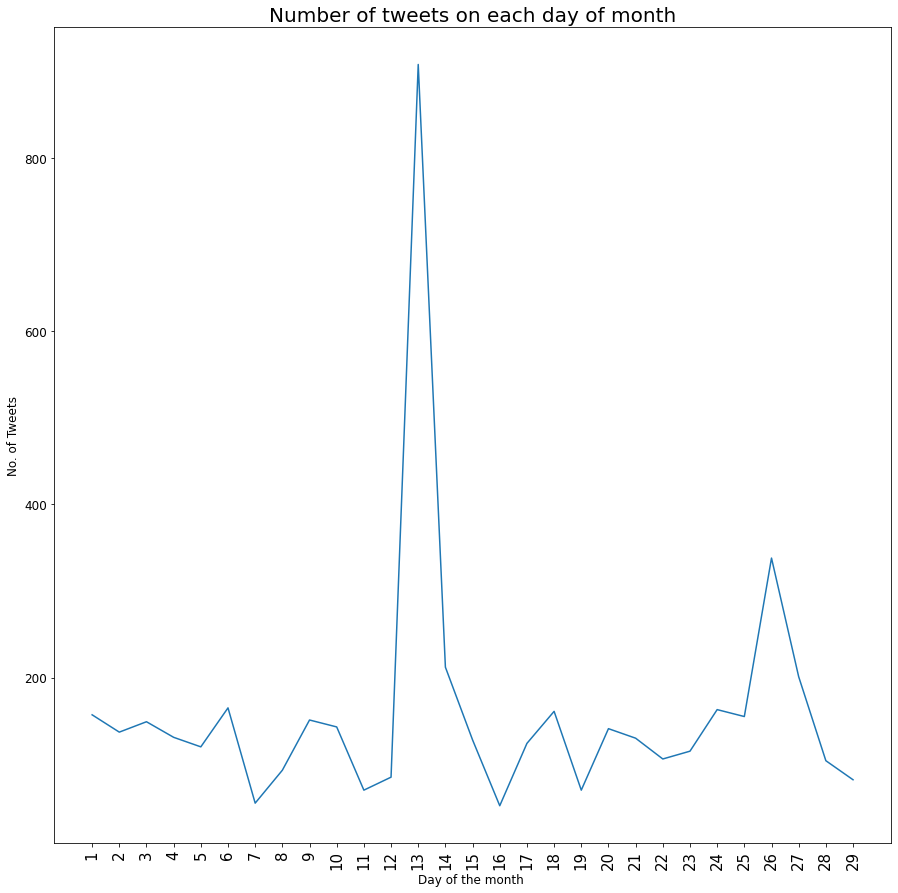

In [119]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Feb2020.keys()), list(timedict_Feb2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Feb2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

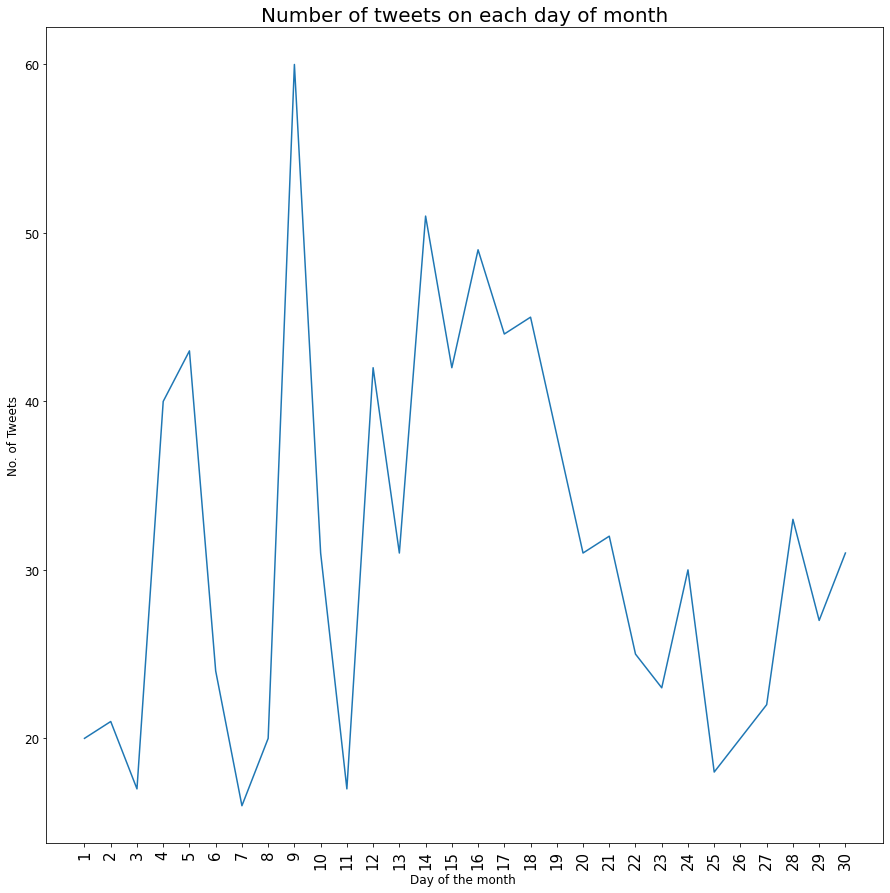

In [65]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Mar2020.keys()), list(timedict_Mar2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Mar2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

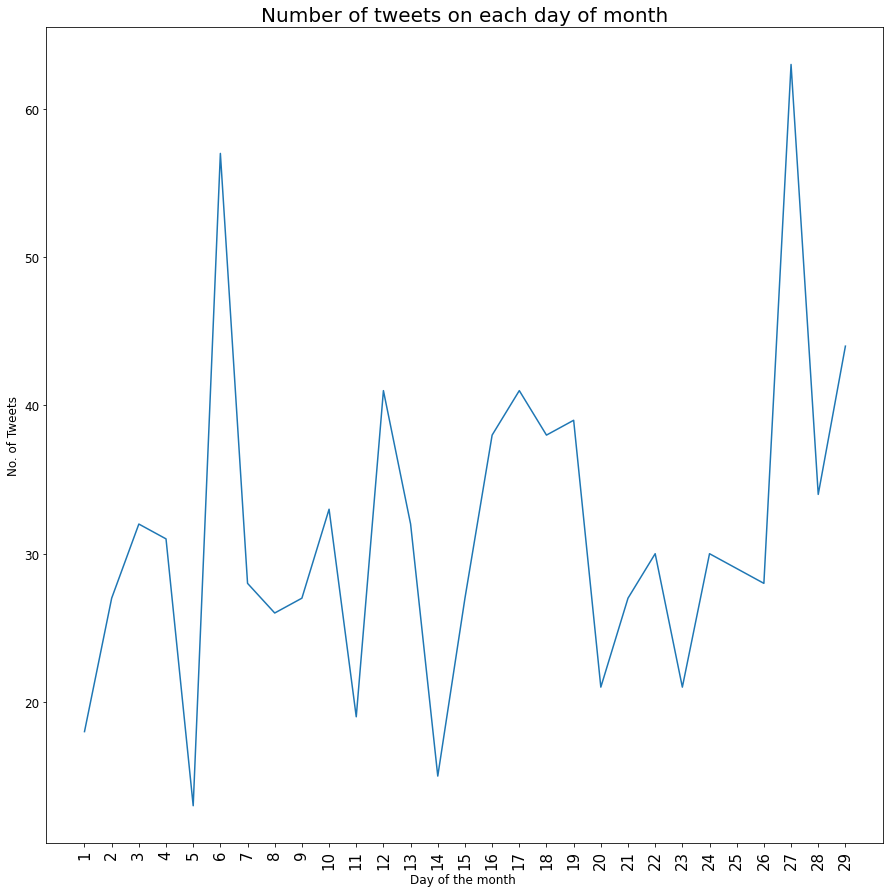

In [66]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Apr2020.keys()), list(timedict_Apr2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Apr2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

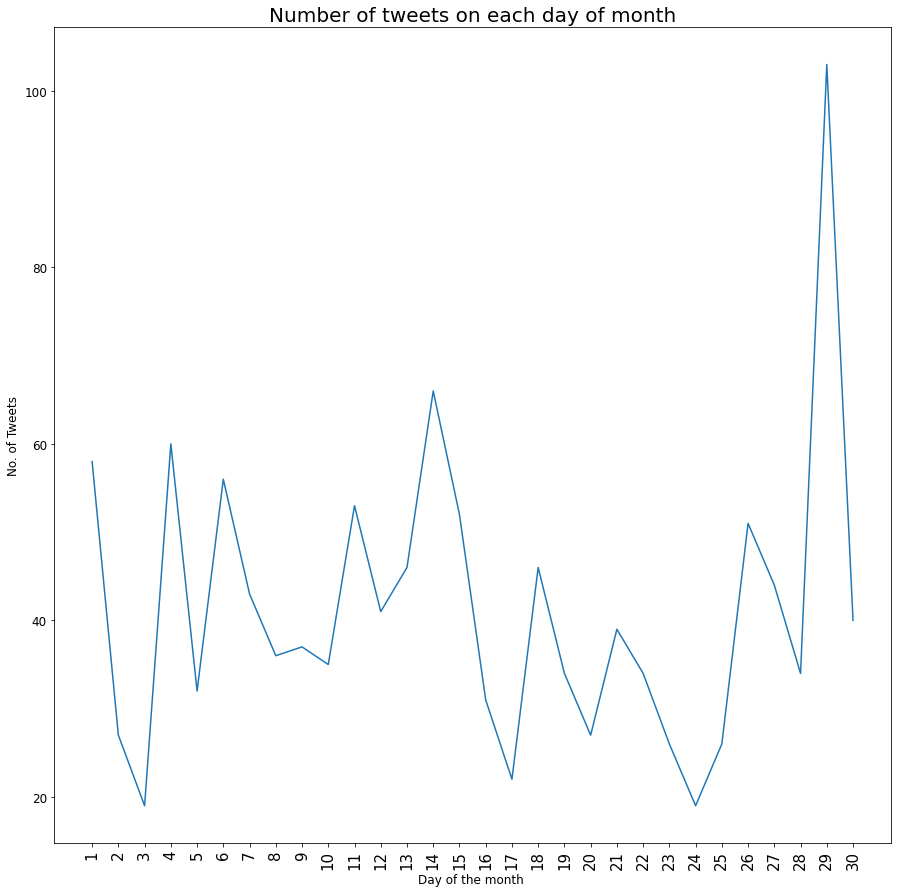

In [67]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_May2020.keys()), list(timedict_May2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_May2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

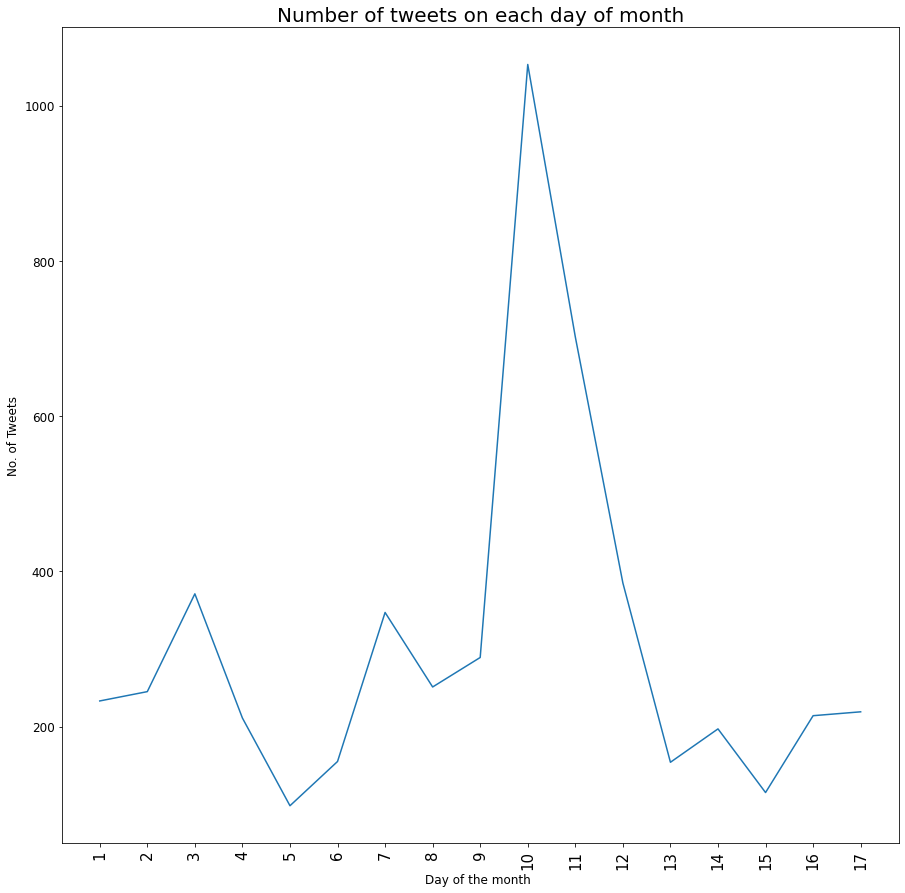

In [123]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_June2020.keys()), list(timedict_June2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_June2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


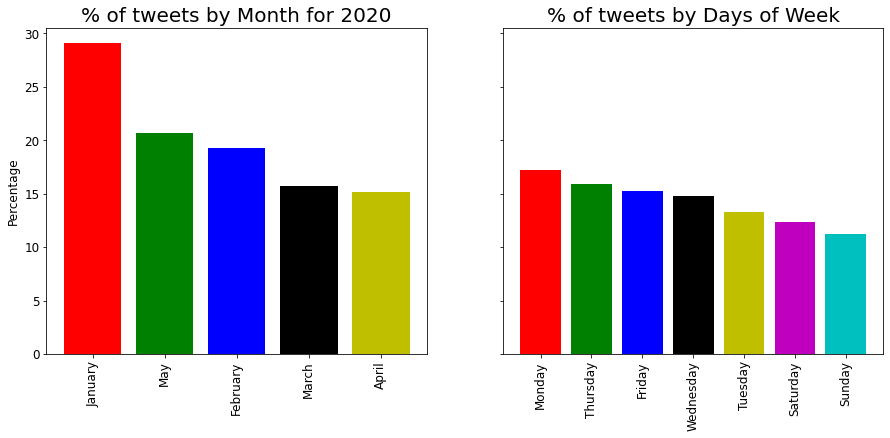

In [68]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = session2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month for 2020')

session2020["dayName"] = session2020.Timestamp.dt.day_name()
data = session2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()


C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


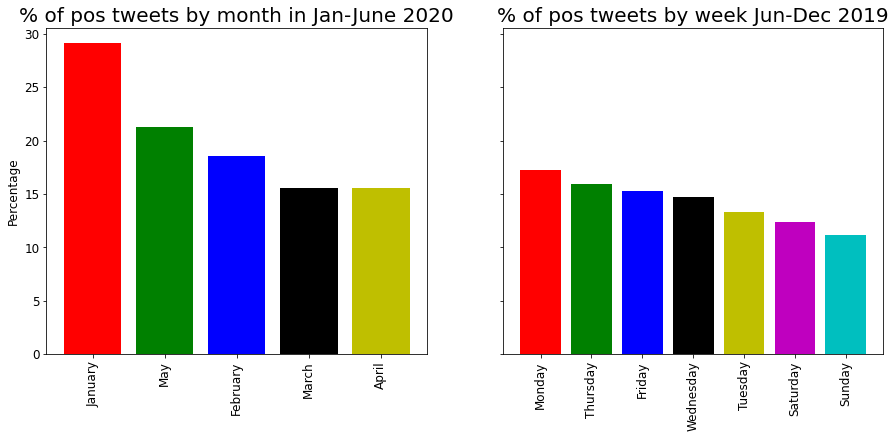

In [69]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2020 = session2020[session2020.Sentiment == 'Positive']
data = pos_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jan-June 2020')

data = session2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


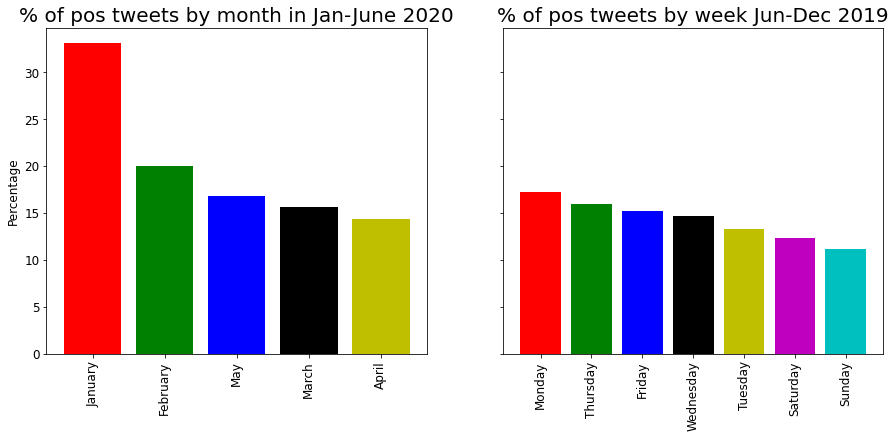

In [70]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neg_2020 = session2020[session2020.Sentiment == 'Negative']
data = neg_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jan-June 2020')

data = session2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

In [71]:
senti2020 = pos_df2020.groupby('month')
senticount2020 = senti2020['text'].count()
sentidict2020 = senticount2020.to_dict()

senti2020neg = neg_df2020.groupby('month')
senticount2020neg = senti2020neg['text'].count()
sentidict2020neg = senticount2020neg.to_dict()

senti2020neu = neu_df2020.groupby('month')
senticount2020neu = senti2020neu['text'].count()
sentidict2020neu = senticount2020neu.to_dict()



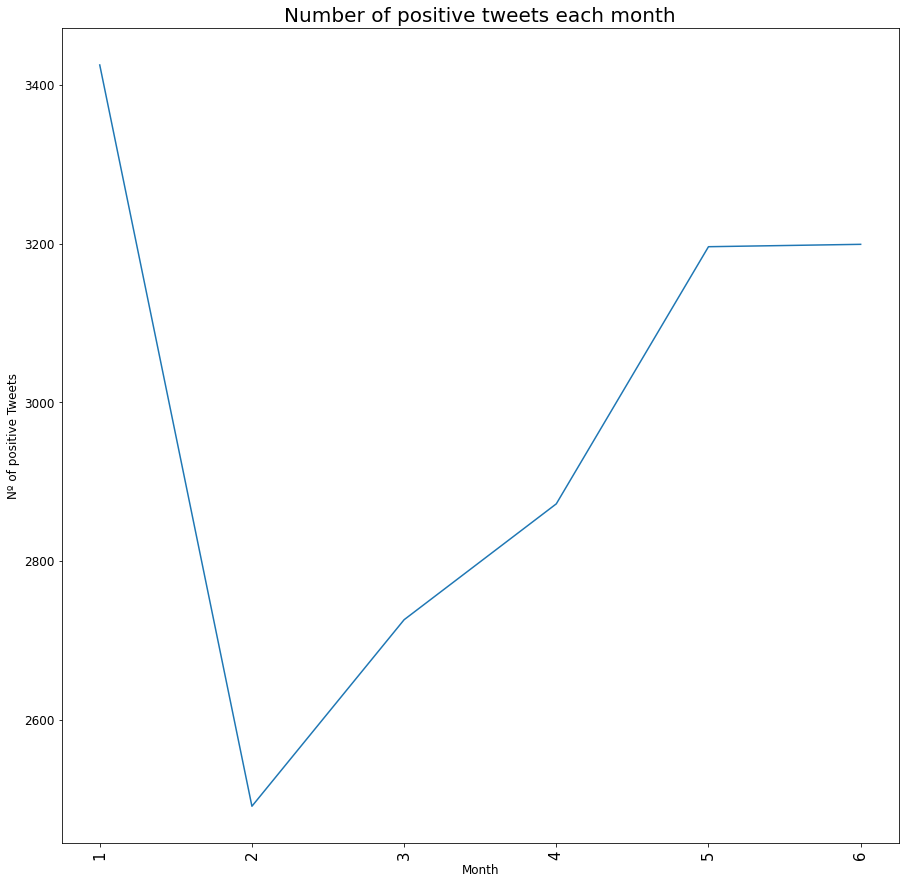

In [132]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2020.keys()), list(sentidict2020.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of positive Tweets', fontsize=12)
plt.xticks(list(monthdict2020.keys()), fontsize=15, rotation=90)
plt.title('Number of positive tweets each month', fontsize = 20)
plt.show()


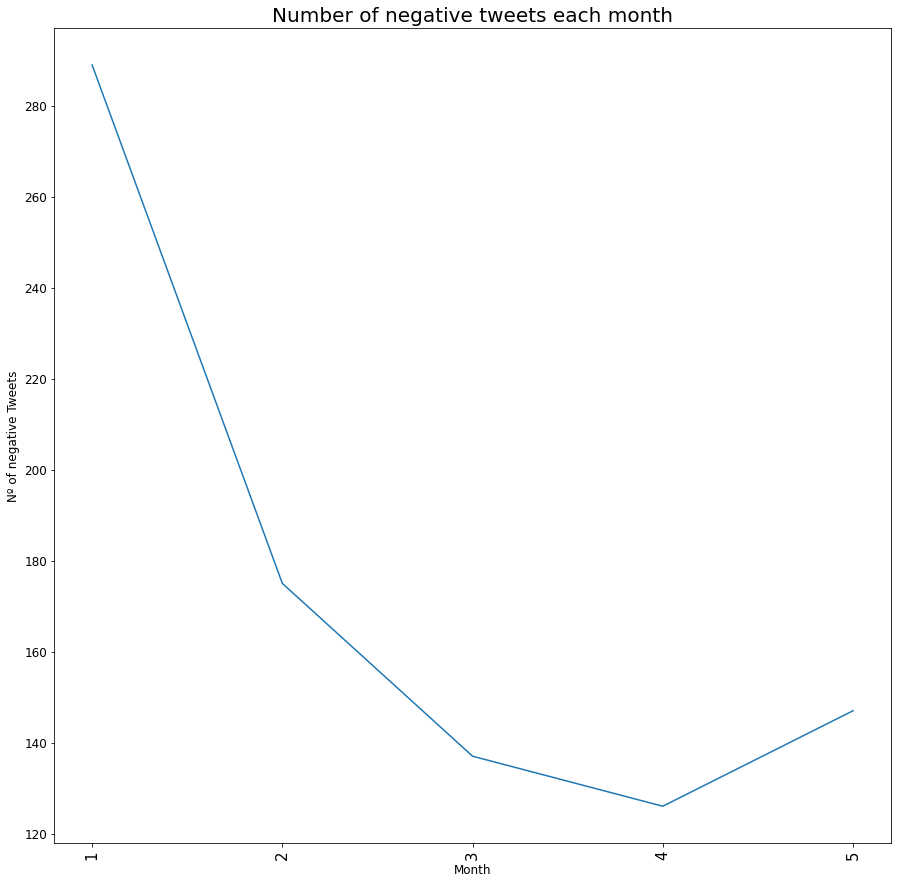

In [72]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2020neg.keys()), list(sentidict2020neg.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of negative Tweets', fontsize=12)
plt.xticks(list(monthdict2020.keys()), fontsize=15, rotation=90)
plt.title('Number of negative tweets each month', fontsize = 20)
plt.show()

In [73]:
wordfreq2020 = {}
for sentence in session2020f['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq2020.keys():
            wordfreq2020[token] = 1
        else:
            wordfreq2020[token] += 1

In [76]:
sorted_wordfreq2020=sorted(wordfreq2020.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq2020

[('iitmadras', 1655),
 ('iit', 843),
 ('madras', 708),
 ('student', 296),
 ('india', 275),
 ('amp', 259),
 ('iitbombay', 236),
 ('technology', 231),
 ('research', 208),
 ('iitdelhi', 203),
 ('covid', 199),
 ('startup', 190),
 ('chennai', 143),
 ('iitkgp', 142),
 ('ai', 134),
 ('team', 132),
 ('indian', 129),
 ('iitm', 123),
 ('prof', 119),
 ('iitkanpur', 118),
 ('science', 106),
 ('developed', 99),
 ('institute', 99),
 ('online', 97),
 ('engineering', 95),
 ('help', 95),
 ('hrdministry', 95),
 ('pm', 94),
 ('read', 93),
 ('researcher', 92),
 ('pmoindia', 90),
 ('today', 87),
 ('dr', 86),
 ('world', 85),
 ('innovation', 85),
 ('course', 82),
 ('new', 82),
 ('alumnus', 81),
 ('data', 80),
 ('year', 79),
 ('session', 79),
 ('one', 78),
 ('professor', 77),
 ('system', 75),
 ('th', 74),
 ('u', 72),
 ('let', 68),
 ('way', 67),
 ('time', 63),
 ('report', 63),
 ('please', 61),
 ('day', 61),
 ('tech', 61),
 ('iitguwahati', 60),
 ('nptel', 59),
 ('also', 59),
 ('event', 58),
 ('go', 58),
 ('univ

In [75]:
most_freq2020 = sorted_wordfreq2020[0:20]
most_freq2020

NameError: name 'sorted_wordfreq2020' is not defined

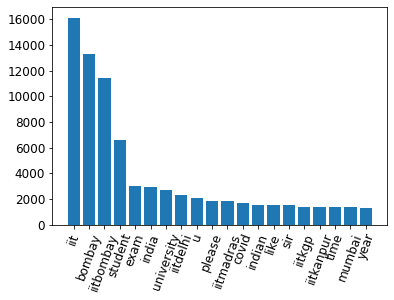

In [140]:
plt.bar(range(len(most_freq2020)), [val[1] for val in most_freq2020], align='center')
plt.xticks(range(len(most_freq2020)), [val[0] for val in most_freq2020])
plt.xticks(rotation=70)
plt.show()

In [79]:
hashtagfreq2020 = {}
for sentence in session2020f['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq2020.keys():
            hashtagfreq2020[token] = 1
        else:
            hashtagfreq2020[token] +=1

In [80]:
sorted_hashtag2020=sorted(hashtagfreq2020.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag2020

[('#', 7186),
 ('IITMadras', 284),
 ('iitmadras', 162),
 ('IIT', 124),
 ('COVID19', 83),
 ('AI', 74),
 ('Chennai', 65),
 ('IITM', 59),
 ('India', 58),
 ('SpecialLectureSeries', 37),
 ('ArtificialIntelligence', 36),
 ('Quarantine', 34),
 ('iit', 33),
 ('LearnAtHome', 33),
 ('IamToWinWithWhatIOwn', 29),
 ('TamilNadu', 28),
 ('startups', 27),
 ('technology', 26),
 ('coronavirus', 26),
 ('intoAInews', 25),
 ('startup', 25),
 ('ecell', 25),
 ('innovation', 24),
 ('COVID', 24),
 ('iitmsynbio', 23),
 ('esummit2020', 23),
 ('Kashmir', 22),
 ('StandWithKashmir', 22),
 ('IITMResearch', 22),
 ('Madras', 21),
 ('research', 21),
 ('IITs', 21),
 ('education', 21),
 ('science', 20),
 ('YIM2020', 20),
 ('LiveSession', 20),
 ('datascience', 19),
 ('ecell_iitm', 17),
 ('iitm', 17),
 ('MachineLearning', 17),
 ('artificialintelligence', 16),
 ('Covid_19', 16),
 ('IITMSynBio', 15),
 ('NPTEL', 15),
 ('Amaravati', 15),
 ('ictacademyindia', 15),
 ('DataScience', 14),
 ('IITMADRAS', 14),
 ('triumphtrails', 14)

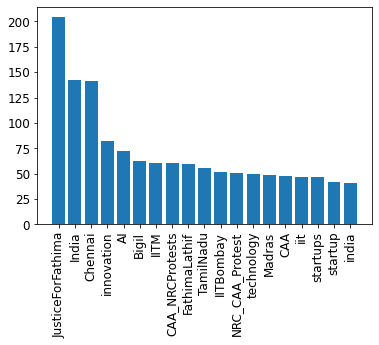

In [82]:
most_freqht2020 = sorted_hashtag2020[6:25]
plt.bar(range(len(most_freqht2020)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht2020)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()